# $$\color{red}{\text{Machine Learning}}$$

$$\color{orange}{\text{Parzen Density Estimation}}$$

$$\color{lime}{\text{Alireza Javid - 810198375}}$$

## $\color{deepskyblue}{\text{Import Libraries}}$

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## $\color{deepskyblue}{\text{Preprocessing}}$
In this part we take a close look at our dataset. As we can see "duration" column ranges from 135 to 5256. Thus, it's better to define $x$ between 100 and 6000.

In [33]:
df = pd.read_csv("ted_main.csv")
df.describe()

,comments,duration,film_date,languages,num_speaker,published_date,views
count,2550.000000,2550.000000,2.550000e+03,2550.000000,2550.000000,2.550000e+03,2.550000e+03
mean,191.562353,826.510196,1.321928e+09,27.326275,1.028235,1.343525e+09,1.698297e+06
std,282.315223,374.009138,1.197391e+08,9.563452,0.207705,9.464009e+07,2.498479e+06
min,2.000000,135.000000,7.464960e+07,0.000000,1.000000,1.151367e+09,5.044300e+04
25%,63.000000,577.000000,1.257466e+09,23.000000,1.000000,1.268463e+09,7.557928e+05
50%,118.000000,848.000000,1.333238e+09,28.000000,1.000000,1.340935e+09,1.124524e+06
75%,221.750000,1046.750000,1.412964e+09,33.000000,1.000000,1.423432e+09,1.700760e+06
max,6404.000000,5256.000000,1.503792e+09,72.000000,5.000000,1.506092e+09,4.722711e+07


In [ ]:
xi = df["duration"].to_numpy()
x = np.linspace(100, 6000, 100000)
estimation = [0, 0, 0, 0]
Vn = [10, 20, 50, 100]

## $\color{deepskyblue}{\text{Parzen Density Estimation with Gaussian Kernrl}}$

In [34]:
def gaussian_kernel(x):
  return 1/(np.sqrt(2*np.pi)) * np.exp(-x**2/2)

def fit_parzen(xi, Vn, x):
  estimation = 0
  for i in range(len(xi)):
    estimation+= 1/len(xi)*1/Vn * gaussian_kernel((x - xi[i])/Vn)
  return estimation

### $\color{deepskyblue}{\text{Plot for Width=10}}$

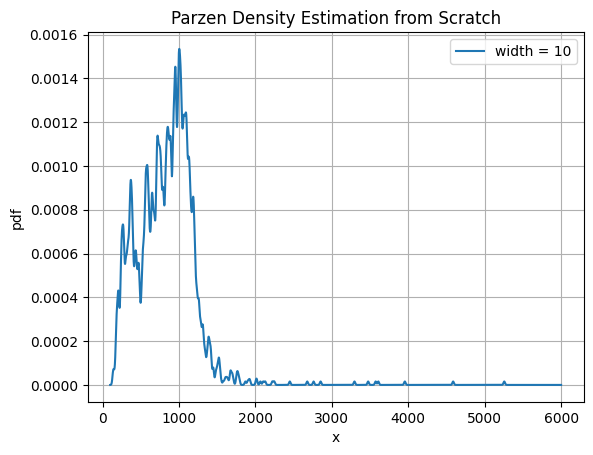

In [35]:
for j in range(len(Vn)):
  estimation[j] = fit_parzen(xi, Vn[j], x)
plt.plot(x, estimation[0], label="width = 10")
plt.legend()
plt.title("Parzen Density Estimation from Scratch")
plt.xlabel("x")
plt.ylabel("pdf")
plt.grid()
plt.show()

## $\color{deepskyblue}{\text{Changes of the Density Function with Widths}}$
As we can see increasing the parzen window make the density function smoother.

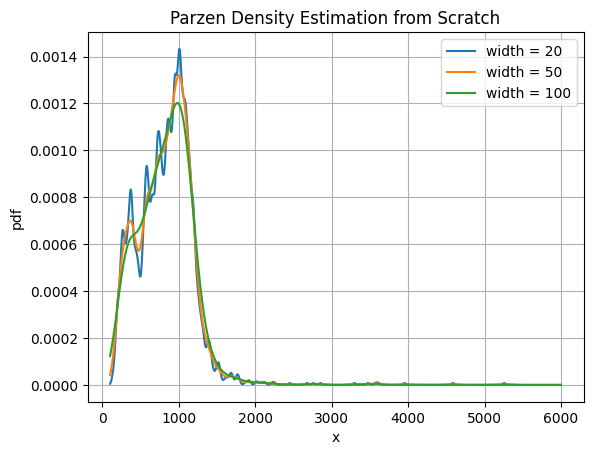

In [36]:
plt.plot(x, estimation[1], label="width = 20")
plt.plot(x, estimation[2], label="width = 50")
plt.plot(x, estimation[3], label="width = 100")
plt.legend()
plt.title("Parzen Density Estimation from Scratch")
plt.xlabel("x")
plt.ylabel("pdf")
plt.grid()
plt.show()

If we use kde to plot the density of the "duration" column, we would see kde function use higher width and it's more like our estimation with width = 100

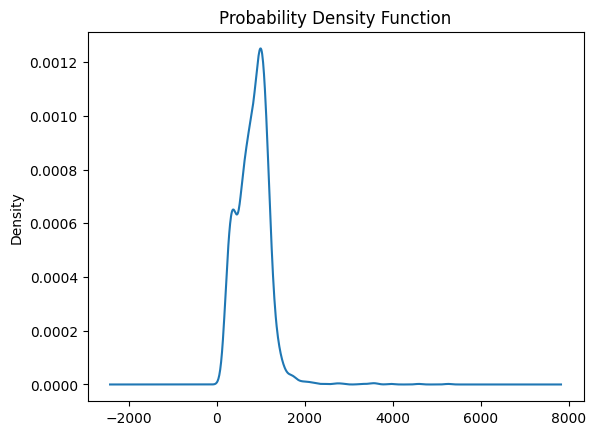

In [43]:
df["duration"].plot.kde()
plt.title("Probability Density Function");

## $\color{deepskyblue}{\text{Convergence of the Density Function}}$

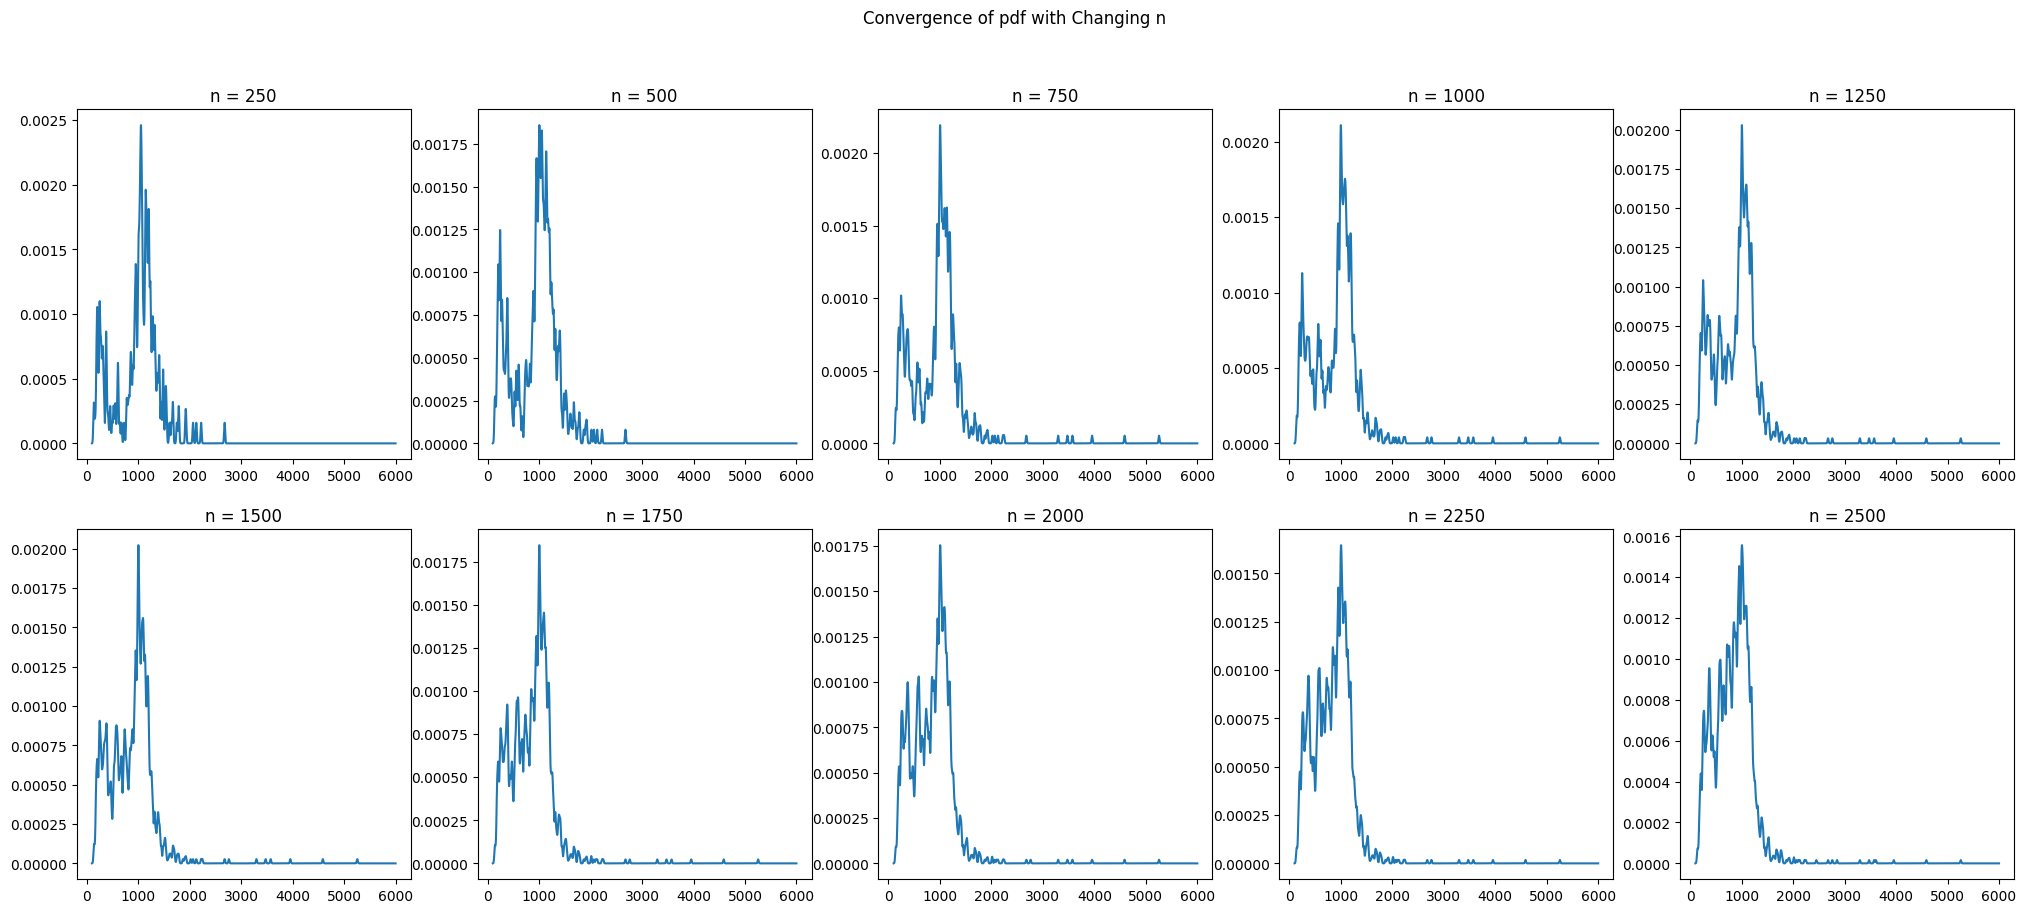

In [38]:
x = np.linspace(100, 6000, 100000)
fig, axes= plt.subplots(2,5, figsize=(25,10))
i, j = 0, 0
for n in range(250,len(xi),250):
  estimation = fit_parzen(xi[:n], Vn[0], x)
  axes[j][i].plot(x, estimation)
  axes[j][i].set_title("n = " + str(n))
  i+=1
  if i==5:
    i=0
    j+=1
fig.suptitle("Convergence of pdf with Changing n")

plt.show()

## $\color{deepskyblue}{\text{Parzen Density Estimation with Sklearn}}$
As we can see the result is similar to the designed model.

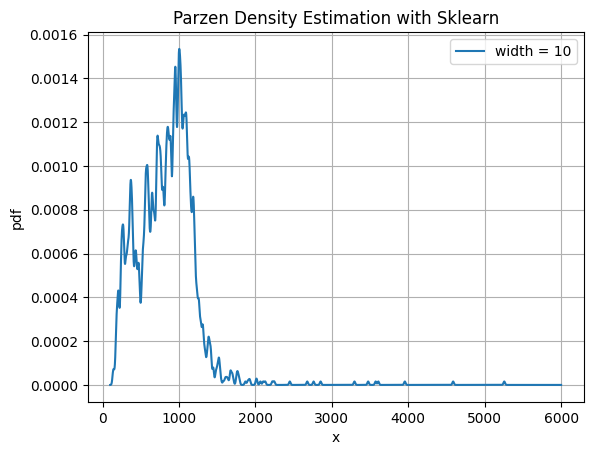

In [39]:
from sklearn.neighbors import KernelDensity

kde = KernelDensity(kernel='gaussian', bandwidth=Vn[0])
kde.fit(xi[:, np.newaxis])
log_density = kde.score_samples(x[:, np.newaxis])
plt.plot(x, np.exp(log_density), label="width = 10")
plt.legend()
plt.title("Parzen Density Estimation with Sklearn")
plt.xlabel("x")
plt.ylabel("pdf")
plt.grid()
plt.show()

And here we use sklearn to depict convergence of pdf

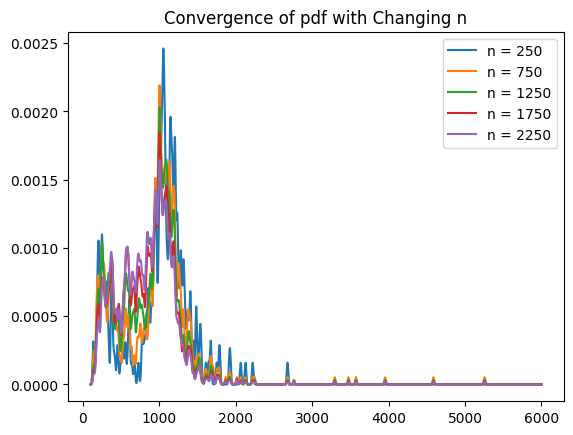

In [40]:
for n in range(250,len(xi),500):
  kde = KernelDensity(kernel='gaussian', bandwidth=Vn[0])
  kde.fit(xi[:n, np.newaxis])
  log_density = kde.score_samples(x[:, np.newaxis])
  plt.plot(x, np.exp(log_density), label="n = " + str(n))
  
plt.title("Convergence of pdf with Changing n")
plt.legend()
plt.show()